# Lecture 7

notes for the code: the file <font face="Courier">input.(state)</font> contains, in order:
- a <font face="Courier">double</font>, the temperature of the simulation;
- an <font face="Courier">int</font>, the number of particles;
- two <font face="Courier">double</font>, respsctively particle density and cutoff radius;
- a <font face="Courier">double</font>, the aplitude of the moves;
- three <font face="Courier">int</font>, equilibration steps, number of blocks and steps per block;
- two <font face="Courier">int</font>, which controls the printing of instant measurements and progressive particle configurations (if set to 1 they will print, else not).

Choose the fase you want to simulate and run <font face="Courier">esercizio7_(n) input.(state)</font> (n=1 or 2). Move the output files (<font face="Courier">intant_(quantity).dat</font> and <font face="Courier">output.(quantity).0</font> in the corresponding state folder). The program take a measure for every step and works with reduced units. <font face="Courier">esercizio7_1</font> will only produce te $5\times10^5$ instant measures, <font face="Courier">esercizio7_2</font> performs the other required tasks.

## Exercise 7.1

### equilibration

we need at least 200 steps to equilibrate the solid phase, 300 for the liquid phase and 800 for the gasseous one. In the following simulation we will use 500 both for the solid and the liquid phase and 1000 for the gasseous.

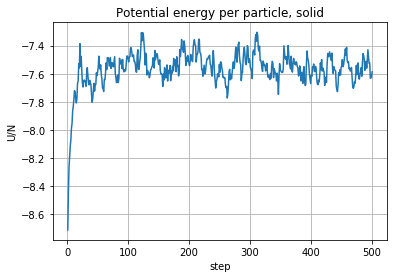

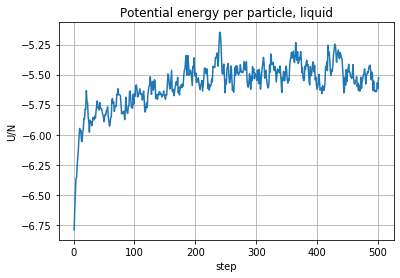

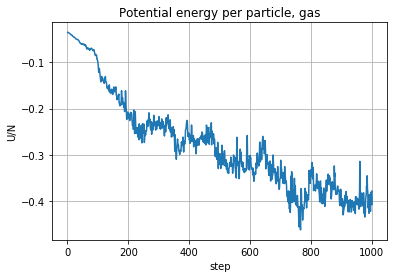

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Epot_se=np.loadtxt("es7.1/Instant_solid/instant_epot_eq.dat", usecols=(0), unpack='true')
x=np.zeros(len(Epot_se))
for i in range(len(x)):
    x[i]=i+1
plt.plot(x,Epot_se)
plt.xlabel('step')
plt.ylabel('U/N')
plt.title('Potential energy per particle, solid')
plt.grid(True)
plt.show()

Epot_le=np.loadtxt("es7.1/Instant_liquid/instant_epot_eq.dat", usecols=(0), unpack='true')
x=np.zeros(len(Epot_le))
for i in range(len(x)):
    x[i]=i+1
plt.plot(x,Epot_le)
plt.xlabel('step')
plt.ylabel('U/N')
plt.title('Potential energy per particle, liquid')
plt.grid(True)
plt.show()

Epot_ge=np.loadtxt("es7.1/Instant_gas/instant_epot_eq.dat", usecols=(0), unpack='true')
x=np.zeros(len(Epot_ge))
for i in range(len(x)):
    x[i]=i+1
plt.plot(x,Epot_ge)
plt.xlabel('step')
plt.ylabel('U/N')
plt.title('Potential energy per particle, gas')
plt.grid(True)
plt.show()

After the equilibration, we measure both potential energy $U$ and pressure $P$ $5\times10^5$ for each phase under the following thermodynamic conditions:
- solid phase: $\rho^* = 1.1$, $T^*r = 0.8$ (cut-off radius: $r_c = 2.2$);
- liquid phase: $\rho^* = 0.8$, $T^* = 1.1$ (cut-off radius: $r_c = 2.5$);
- gas phase: $\rho^* = 0.05$, $T^* = 1.2$ (cut-off radius: $r_c = 5.0$); <br>

    for a sistem of $108$ particles, starting from the $fcc$ configuration. To know how long should be a simulation block, we first calculate the autocorrelation $\chi$ as a function of time for both the quantities of interest, then we compute their statistical uncertanties $\sigma^2$ for increasing block lenght, for $L \in [10;5000]$.

### autocorrelation $\chi(t)$

We will observe for what $t^*$ $\chi(t>t^*) \sim 0$ and then take $2t^*$ as a rough estimate for the block lenght. 

In [15]:
def autocorrelation(y, steps):
    variance=np.var(y)
    tmax=len(y)
    chi=np.zeros(steps)
    
    for t in range(0,steps):
        sum_prod=0
        sum_t1=0
        sum_tt1=0
        dt=tmax-t
        for t1 in range (0,tmax-t):
            sum_prod+=y[t1]*y[t+t1]
            sum_t1+=y[t1]
            sum_tt1+=y[t+t1]
        chi[t]=(sum_prod/dt-sum_t1*sum_tt1/dt**2)/variance
        
    return chi

In [60]:
Epot_s=np.loadtxt("es7.1/Instant_solid/instant_epot.dat", usecols=(0), unpack='true')
Pres_s=np.loadtxt("es7.1/Instant_solid/instant_pres.dat", usecols=(0), unpack='true')

Epot_l=np.loadtxt("es7.1/Instant_liquid/instant_epot.dat", usecols=(0), unpack='true')
Pres_l=np.loadtxt("es7.1/Instant_liquid/instant_pres.dat", usecols=(0), unpack='true')

Epot_g=np.loadtxt("es7.1/Instant_gas/instant_epot.dat", usecols=(0), unpack='true')
Pres_g=np.loadtxt("es7.1/Instant_gas/instant_pres.dat", usecols=(0), unpack='true')

steps=500
x=np.zeros(steps)
for i in range(steps):
    x[i]=i+1

#### solid

We can see that $\chi(t) \sim 0$ for $t<100$. A good block lenght should be $L=200$.

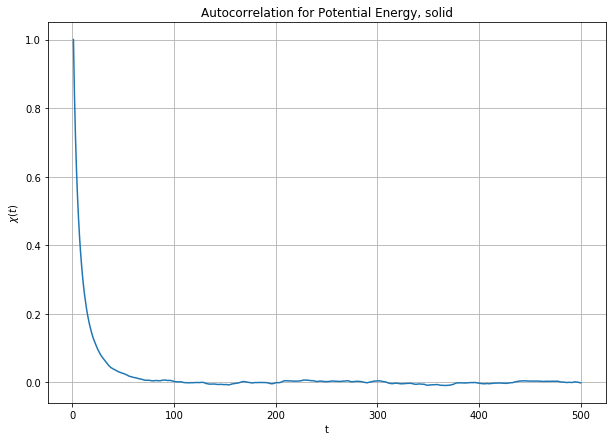

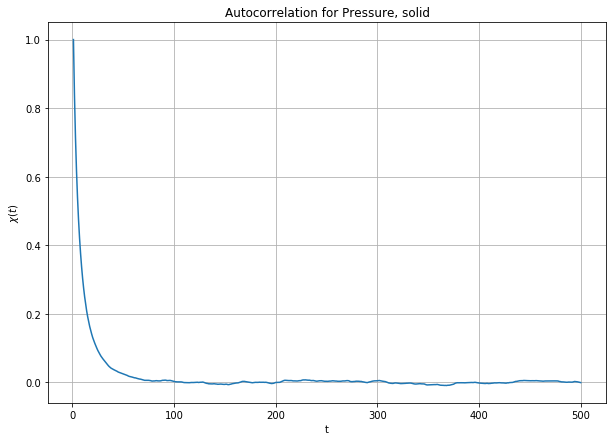

In [41]:
Epot_s_chi=autocorrelation(Epot_s,steps)
Pres_s_chi=autocorrelation(Pres_s,steps)

plt.figure(0,figsize=(10,7))
plt.plot(x,Epot_s_chi)
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Potential Energy, solid')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Pressure, solid')
plt.plot(x,Pres_s_chi)
plt.grid(True)
plt.show()

#### liquid

Now $\chi(t) \sim 0$ for $t>400$. We shold use $L>800$.

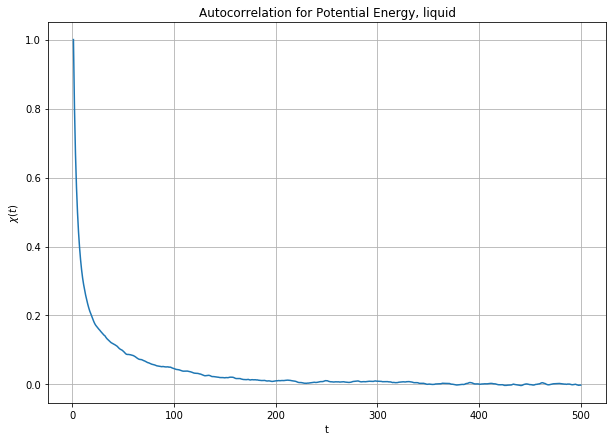

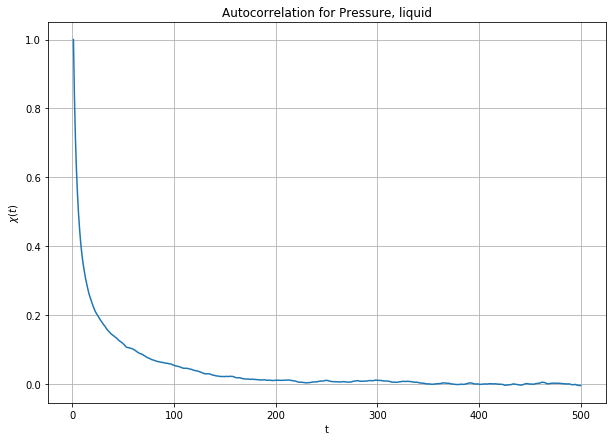

In [29]:
Epot_l_chi=autocorrelation(Epot_l,steps)
Pres_l_chi=autocorrelation(Pres_l,steps)

plt.figure(0,figsize=(10,7))
plt.plot(x,Epot_l_chi)
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Potential Energy, liquid')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.plot(x,Pres_l_chi)
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Pressure, liquid')
plt.grid(True)
plt.show()

#### gas

Wile $\chi_P(t) \sim 0$ for $t>100$, $\chi_U(t)$ is still non negligible for $t=500$. Therefore, we should use at least $L=1000$.

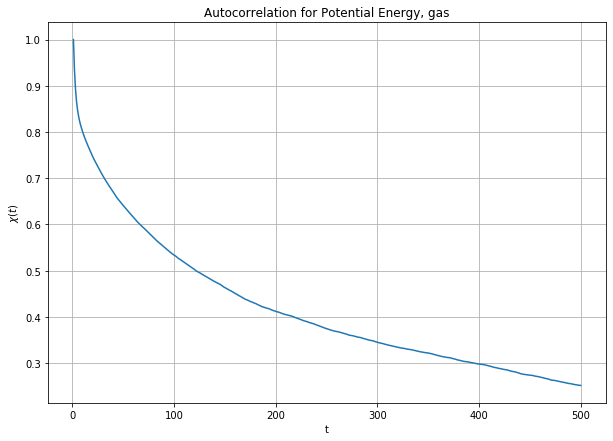

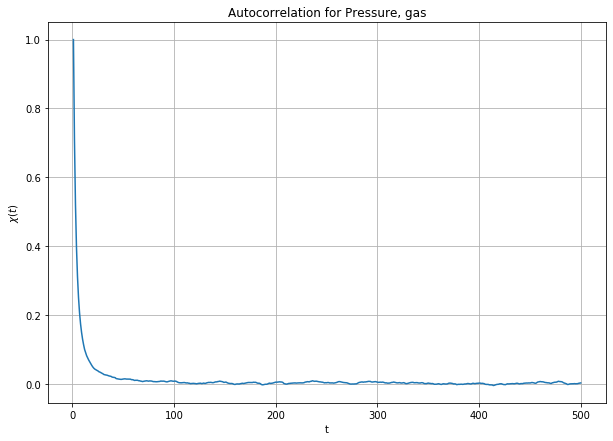

In [30]:
Epot_g_chi=autocorrelation(Epot_g,steps)
Pres_g_chi=autocorrelation(Pres_g,steps)

plt.figure(0,figsize=(10,7))
plt.plot(x,Epot_g_chi)
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Potential Energy, gas')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.plot(x,Pres_g_chi)
plt.xlabel('t')
plt.ylabel(r'$\chi(t)$')
plt.title('Autocorrelation for Pressure, gas')
plt.grid(True)
plt.show()

### statistical uncertanties $\sigma^2$

with short blocks, uncertanties are underestimated, while should saturate after some value  $L^*$, which will be our block lenght.

In [67]:
def block_stat(y, L):
    def error(sum, sum2, i):
        if i==0:
            return 0
        else:
            return np.sqrt((sum2-sum**2)/i)
        
    M=len(y)
    N=int(M/L)
    ave=np.zeros(N)
    ave2=np.zeros(N)
    ave_sum=np.zeros(N)
    ave_sum2=np.zeros(N)
    err=np.zeros(N)
    
    for i in range(N):
        sum=0
        for j in range(int(L)):
            k=int(j+i*L)
            sum+=y[k]
        sum/=L
        ave[i]=sum
        ave2[i]=sum**2
    
    for i in range(N):
        sum=0
        sum2=0
        for j in range(int(i+1)):
            sum+=ave[j]
            sum2+=ave2[j]
        sum/=(i+1)
        sum2/=(i+1)
        ave_sum[i]=sum
        ave_sum2[i]=sum2
        err[i]=error(sum,sum2,i)
        
    return err[-1]

In [78]:
Epot_s_err=np.zeros(500)
Pres_s_err=np.zeros(500)
Epot_l_err=np.zeros(500)
Pres_l_err=np.zeros(500)
Epot_g_err=np.zeros(500)
Pres_g_err=np.zeros(500)
block_lenght=np.zeros(500)
for i in range(500):
    block_lenght[i]=(i+1)*10

#### solid

for the solid phase we can se that, roughly for $L>500$, the standard deviation saturates and starts to oscillate around a value. In the following simulations, the block lenght for this phase will be $L=500$.

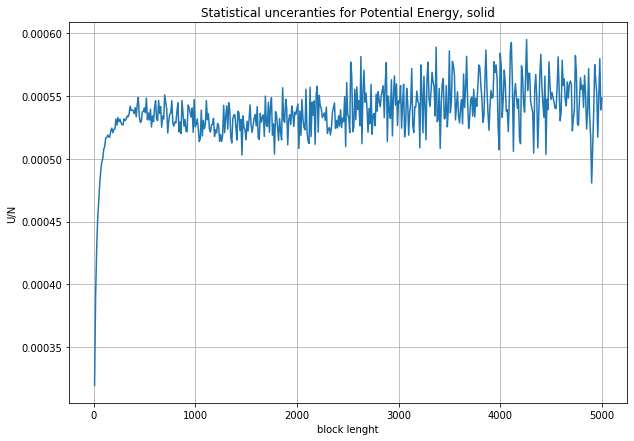

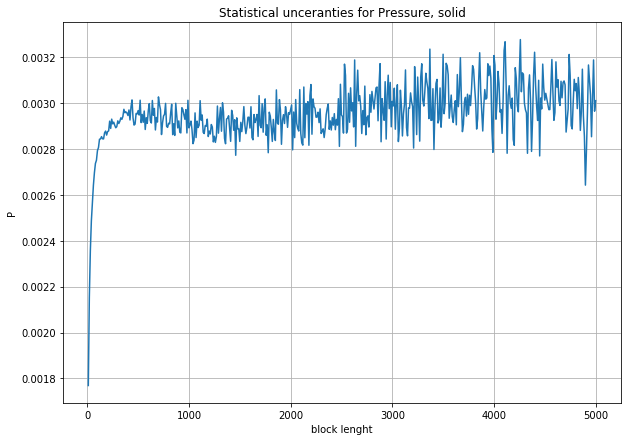

In [79]:
for i in range(500):
    L=(i+1)*10
    Epot_s_err[i]=block_stat(Epot_s,L)
    Pres_s_err[i]=block_stat(Pres_s,L)

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Epot_s_err)
plt.xlabel('block lenght')
plt.ylabel(r'U/N')
plt.title('Statistical unceranties for Potential Energy, solid')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Pres_s_err)
plt.xlabel('block lenght')
plt.ylabel(r'P')
plt.title('Statistical unceranties for Pressure, solid')
plt.grid(True)
plt.show()

#### liquid

here we have saturation around $L=1000$, that will be the block lenght to simualte the liquid phase.

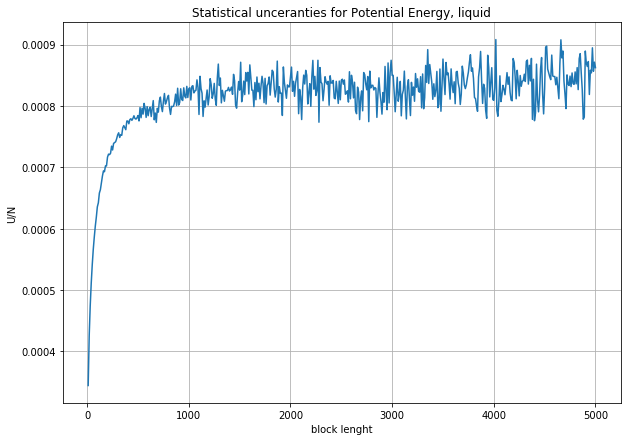

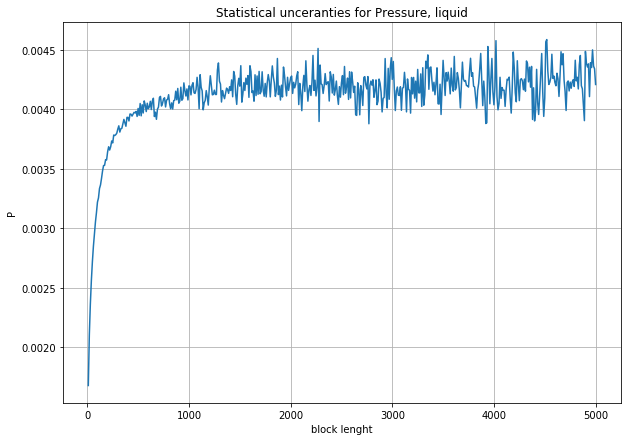

In [80]:
for i in range(500):
    L=(i+1)*10
    Epot_l_err[i]=block_stat(Epot_l,L)
    Pres_l_err[i]=block_stat(Pres_l,L)

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Epot_l_err)
plt.xlabel('block lenght')
plt.ylabel(r'U/N')
plt.title('Statistical unceranties for Potential Energy, liquid')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Pres_l_err)
plt.xlabel('block lenght')
plt.ylabel(r'P')
plt.title('Statistical unceranties for Pressure, liquid')
plt.grid(True)
plt.show()

#### gas

we can see that statistical uncertanties are still increasing for $L=5000$, but using block of that lenght will slow down the simulation. 

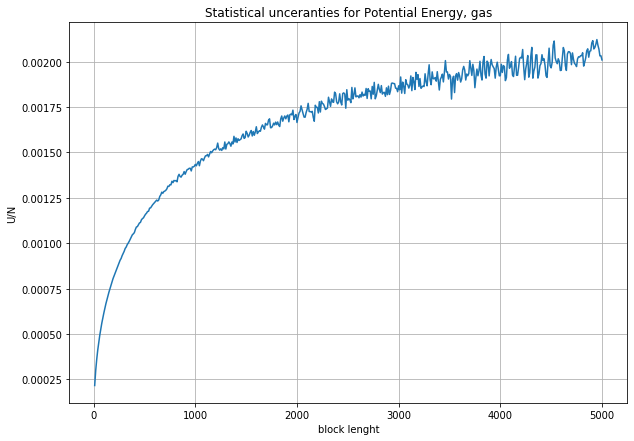

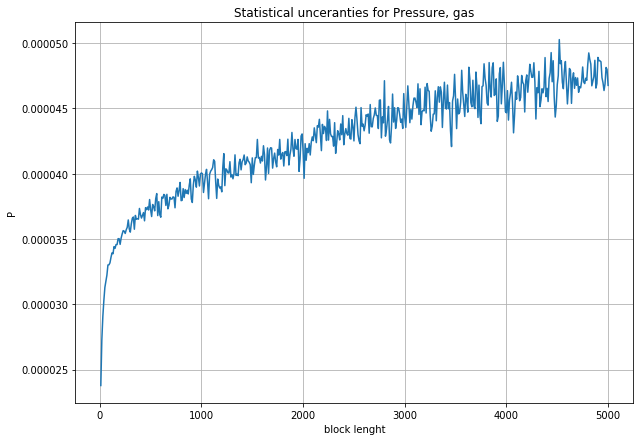

In [81]:
for i in range(500):
    L=(i+1)*10
    Epot_g_err[i]=block_stat(Epot_g,L)
    Pres_g_err[i]=block_stat(Pres_g,L)

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Epot_g_err)
plt.xlabel('block lenght')
plt.ylabel(r'U/N')
plt.title('Statistical unceranties for Potential Energy, gas')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,7))
plt.plot(block_lenght,Pres_g_err)
plt.xlabel('block lenght')
plt.ylabel(r'P')
plt.title('Statistical unceranties for Pressure, gas')
plt.grid(True)
plt.show()

## Exercises 7.2, 7.3

We calculate the radial distribution function $g(r)$ both for this exercise (Canonical Ensemble) and the exercise 4 (Microcanonical Ensemble).

### solid

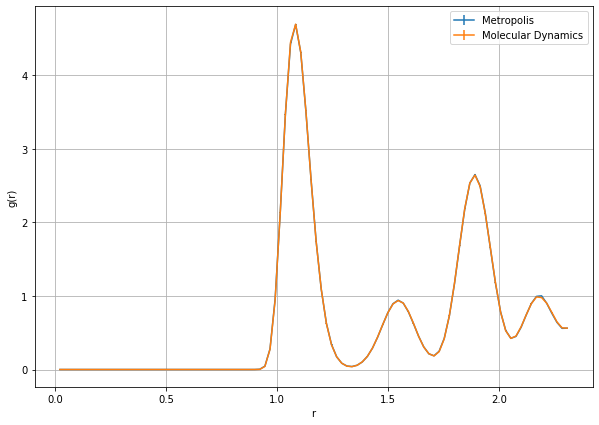

In [13]:
rs_m,gs_m,gs_me=np.loadtxt("es7.2/Solid/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')
rs_d,gs_d,gs_de=np.loadtxt("../Lez4/es4/Solid/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')

plt.figure(0,figsize=(10,7))
plt.errorbar(rs_m,gs_m,yerr=gs_me, label='Metropolis')
plt.errorbar(rs_d,gs_d,yerr=gs_de, label='Molecular Dynamics')
plt.xlabel('r')
plt.ylabel(r'g(r)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### liquid

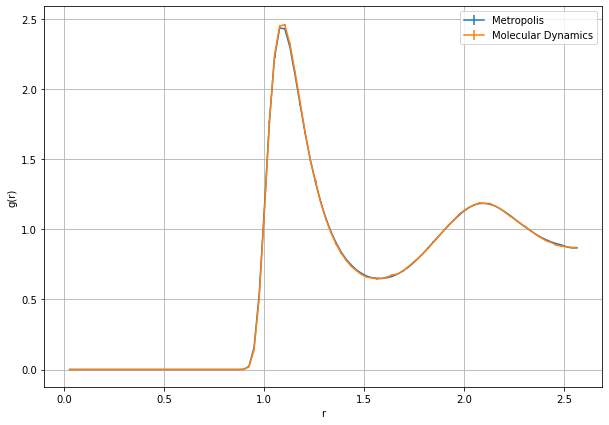

In [17]:
rl_m,gl_m,gl_me=np.loadtxt("es7.2/Liquid/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')
rl_d,gl_d,gl_de=np.loadtxt("../Lez4/es4/Liquid/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')

plt.figure(0,figsize=(10,7))
plt.errorbar(rl_m,gl_m,yerr=gl_me, label='Metropolis')
plt.errorbar(rl_d,gl_d,yerr=gl_de, label='Molecular Dynamics')
plt.xlabel('r')
plt.ylabel(r'g(r)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### gas

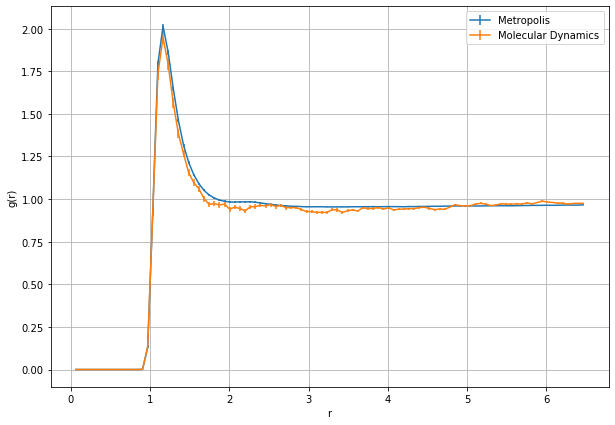

In [23]:
rg_m,gg_m,gg_me=np.loadtxt("es7.2/Gas/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')
rg_d,gg_d,gg_de=np.loadtxt("../Lez4/es4/Gas/output.gave.0", usecols=(1,3,4), delimiter=" ", unpack='true')

plt.figure(0,figsize=(10,7))
plt.errorbar(rg_m,gg_m,yerr=gg_me, label='Metropolis')
plt.errorbar(rg_d,gg_d,yerr=gg_de, label='Molecular Dynamics')
plt.xlabel('r')
plt.ylabel(r'g(r)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Exercise 7.4

We simulate again the behaviour of the three phases of Argon, now in the canonical ensemble, and compare the results obtained from the microcanonical simulation.

In [9]:
kB=1.38065e-23
E=1.6568e-21
EeV=0.0103
sigma=0.34e-9
P=E/sigma**3

### solid

in reduced units: $\rho^*=1.1$, $T^*=0.8$ (cut-off radius: $r_c=2.2$)

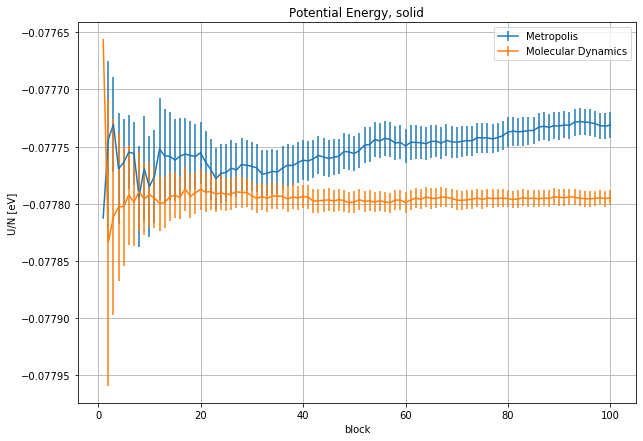

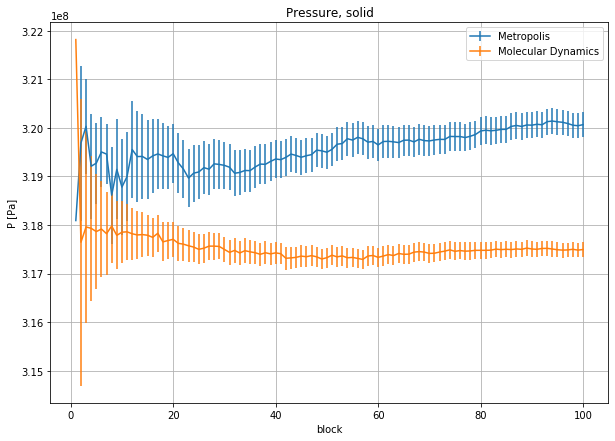

In [19]:
x,Epots_m,Epots_me=np.loadtxt("es7.2/Solid/output.epot.0", usecols=(0,2,3), delimiter=" ", unpack='true')
Epots_d,Epots_de=np.loadtxt("../Lez4/es4/Solid/output.epot.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,EeV*Epots_m,yerr=EeV*Epots_me, label='Metropolis')
plt.errorbar(x,EeV*Epots_d,yerr=EeV*Epots_de, label='Molecular Dynamics')
plt.title("Potential Energy, solid")
plt.xlabel('block')
plt.ylabel(r'U/N [eV]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Press_m,Press_me=np.loadtxt("es7.2/Solid/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
Press_d,Press_de=np.loadtxt("../Lez4/es4/Solid/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,P*Press_m,yerr=P*Press_me, label='Metropolis')
plt.errorbar(x,P*Press_d,yerr=P*Press_de, label='Molecular Dynamics')
plt.title("Pressure, solid")
plt.xlabel('block')
plt.ylabel(r'P [Pa]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### liquid

in reduced units: $\rho^*= 0.8$, $T^*=1.1$ (cut-off radius: $r_c=2.5$)

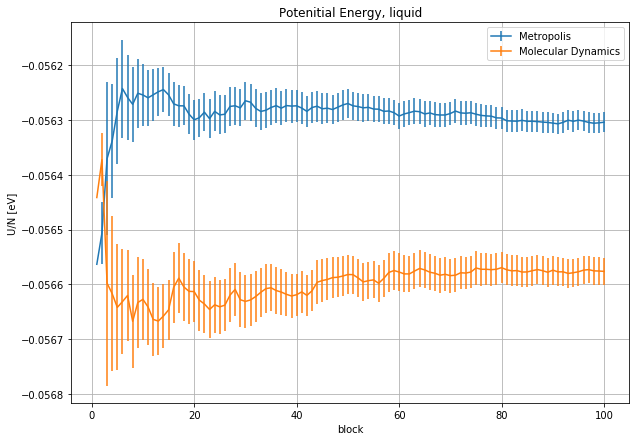

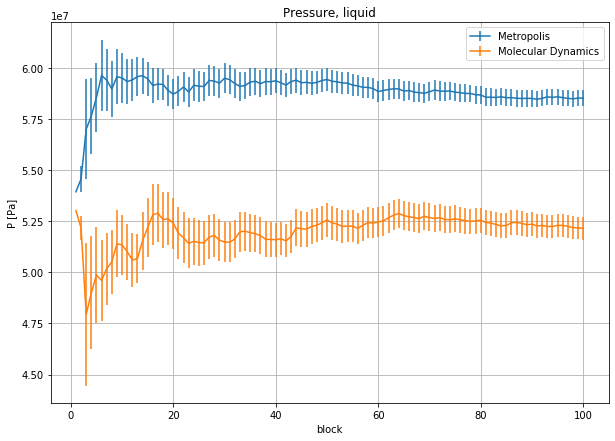

In [20]:
x,Epotl_m,Epotl_me=np.loadtxt("es7.2/Liquid/output.epot.0", usecols=(0,2,3), delimiter=" ", unpack='true')
Epotl_d,Epotl_de=np.loadtxt("../Lez4/es4/Liquid/output.epot.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,EeV*Epotl_m,yerr=EeV*Epotl_me, label='Metropolis')
plt.errorbar(x,EeV*Epotl_d,yerr=EeV*Epotl_de, label='Molecular Dynamics')
plt.title("Potenitial Energy, liquid")
plt.xlabel('block')
plt.ylabel(r'U/N [eV]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Presl_m,Presl_me=np.loadtxt("es7.2/Liquid/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
Presl_d,Presl_de=np.loadtxt("../Lez4/es4/Liquid/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,P*Presl_m,yerr=P*Presl_me, label='Metropolis')
plt.errorbar(x,P*Presl_d,yerr=P*Presl_de, label='Molecular Dynamics')
plt.title("Pressure, liquid")
plt.xlabel('block')
plt.ylabel(r'P [Pa]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### gas

in reduced units: $\rho^*= 0.05$, $T^*=1.2$ (cut-off radius: $r_c=5.0$)

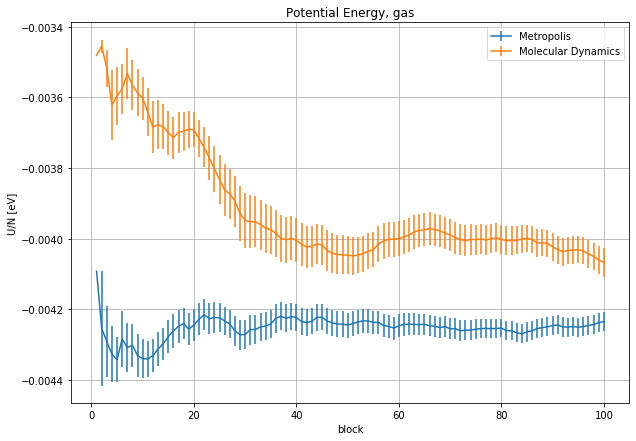

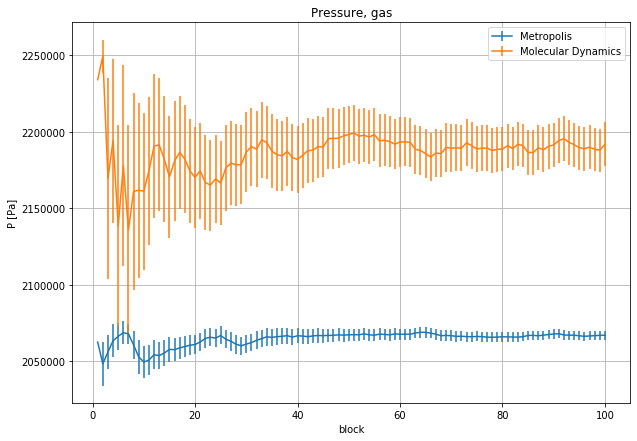

In [24]:
x,Epotg_m,Epotg_me=np.loadtxt("es7.2/Gas/output.epot.0", usecols=(0,2,3), delimiter=" ", unpack='true')
Epotg_d,Epotg_de=np.loadtxt("../Lez4/es4/Gas/output.epot.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,EeV*Epotg_m,yerr=EeV*Epotg_me, label='Metropolis')
plt.errorbar(x,EeV*Epotg_d,yerr=EeV*Epotg_de, label='Molecular Dynamics')
plt.title("Potential Energy, gas")
plt.xlabel('block')
plt.ylabel(r'U/N [eV]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Presg_m,Presg_me=np.loadtxt("es7.2/Gas/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
Presg_d,Presg_de=np.loadtxt("../Lez4/es4/Gas/output.pres.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,7))
plt.errorbar(x,P*Presg_m,yerr=P*Presg_me, label='Metropolis')
plt.errorbar(x,P*Presg_d,yerr=P*Presg_de, label='Molecular Dynamics')
plt.title("Pressure, gas")
plt.xlabel('block')
plt.ylabel(r'P [Pa]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()